In [0]:
%pip install transformers==4.4
%pip install torch==1.9.0
%pip install spacy==3.1.3

Python interpreter will be restarted.
Collecting transformers==4.4
 Downloading transformers-4.4.0-py3-none-any.whl (2.1 MB)
Collecting sacremoses
 Using cached sacremoses-0.0.53-py3-none-any.whl
Collecting tqdm>=4.27
 Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
Requirement already satisfied: numpy>=1.17 in /databricks/python3/lib/python3.8/site-packages (from transformers==4.4) (1.19.2)
Collecting regex!=2019.12.17
 Using cached regex-2022.4.24-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (764 kB)
Requirement already satisfied: filelock in /usr/local/lib/python3.8/dist-packages (from transformers==4.4) (3.0.12)
Collecting tokenizers<0.11,>=0.10.1
 Using cached tokenizers-0.10.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.3 MB)
Requirement already satisfied: requests in /databricks/python3/lib/python3.8/site-packages (from transformers==4.4) (2.25.1)
Requirement already satisfied: packaging in /databricks/python3/lib/python3.8/site-packages (from transformers==4.4) (20.9)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging->transformers==4.4) (2.4.7)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests->transformers==4.4) (2020.12.5)
Requirement already satisfied: chardet<5,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests->transformers==4.4) (4.0.0)
Requirement already satisfied: urllib3<1.27,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests->transformers==4.4) (1.25.11)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests->transformers==4.4) (2.10)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from sacremoses->transformers==4.4) (1.15.0)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from sacremoses->transformers==4.4) (1.0.1)
Collecting click
 Downloading click-8.1.3-py3-none-any.whl (96 kB)
Installing collected packages: tqdm, regex, click, tokenizers, sacremoses, transformers
Successfully installed click-8.1.3 regex-2022.4.24 sacremoses-0.0.53 tokenizers-0.10.3 tqdm-4.64.0 transformers-4.4.0
WARNING: You are using pip version 21.0.1; however, version 22.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-055e5a6a-c032-4fcf-9ab3-5bd2b6b5db7f/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting torch==1.9.0
 Using cached torch-1.9.0-cp38-cp38-manylinux1_x86_64.whl (831.4 MB)
Collecting typing-extensions
 Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
Installing collected packages: typing-extensions, torch
Successfully installed torch-1.9.0 typing-extensions-4.2.0
WARNING: You are using pip version 21.0.1; however, version 22.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-055e5a6a-c032-4fcf-9ab3-5bd2b6b5db7f/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting spacy==3.1.3
 Using cached spacy-3.1.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.1 MB)
Collecting murmurhash<1.1.0,>=0.28.0
 Using cached murmurhash-1.0.7-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (21 kB)
Collecting pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4
 Using cached pydantic-1.8.2-cp38-cp38-manylinux2014_x86_64.whl (13.7 MB)
Requirement already satisfied: setuptools in /usr/local/lib/python3.8/dist-packages (from spacy==3.1.3) (52.0.0)
Requirement already satisfied: tqdm<5.0.0,>=4.38.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-055e5a6a-c032-4fcf-9ab3-5bd2b6b5db7f/lib/python3.8/site-packages (from spacy==3.1.3) (4.64.0)
Collecting type

In [0]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import re
import datetime as dt

from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup,BertForMaskedLM, BertTokenizer
from transformers import AutoTokenizer, AutoModelForMaskedLM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from textwrap import wrap
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [0]:
#################  COPIAR ARCHIVOS EN SYNAPSE DESDE DATALAKE
#Correr el comando de abajo solo cuando se quiera modificar algun archivo como por ejemplo el dataset. Modificando los nombres de los archivos para copiar de datalake a synapse y poder usarlo aca.

# dbutils.fs.cp('/mnt/contenedor/Efecty_VoC/NLP Models/Datasets/Temas/tabla param_temas_testeo.csv','/Efecty_VoC/BETOmodel/Datasets/tabla param_temas_testeo.csv')

In [0]:
%sql
DROP TABLE IF EXISTS PRUEBA_DATASET;
CREATE TABLE PRUEBA_DATASET
USING CSV
LOCATION '/mnt/contenedor/Efecty_VoC/NLP Models/Datasets/Temas/Dataset_temas_11.5.2022.csv';

In [0]:
%sql
select * from PRUEBA_DATASET
limit 10

_c0
wrapup/subtipo/encuesta;Nueva propuesta Categor�a
1- Certificaci�n de pagos;Solicitud Cliente
1- Corresponsal Bancario;Convenios general
1- Inf. Subsidio del gobierno;Subsidios
1- Informaci�n activaci�n de giro;Giros
1- Tu cuenta - Informaci�n Cuenta;Transacciones digitales
1- Tu cuenta - Movimientos;Transacciones digitales
1- Tu cuenta - p�gina web;Novedad Canal digital
1- Tu cuenta - Pago;Transacciones digitales
1- Tu cuenta - Transferencias;Transacciones digitales


In [0]:
# Definición de Parametros

dbutils.widgets.text("max_lenght", "","")
dbutils.widgets.text("batch_size", "","")
dbutils.widgets.text("epochs", "","")
dbutils.widgets.text("test_size", "","")
dbutils.widgets.text("Nombre_archivo_dataset", "","")
dbutils.widgets.text("Nombre_archivo_testeo", "","")

MAX_LEN = int(dbutils.widgets.get("max_lenght"))
BATCH_SIZE = int(dbutils.widgets.get("batch_size"))
EPOCHS = int(dbutils.widgets.get("epochs"))
TEST_SIZE = float(dbutils.widgets.get("test_size"))
Nombre_archivo_dataset = dbutils.widgets.get("Nombre_archivo_dataset")
Nombre_archivo_testeo=dbutils.widgets.get("Nombre_archivo_testeo") #testeo_temas.11.05.2022

In [0]:
# Carga de data y configuraciones iniciales
RANDOM_SEED = 42
df = pd.read_csv(f"/dbfs/Efecty_VoC/BETOmodel/Datasets/{Nombre_archivo_dataset}.csv", sep=';',encoding = 'unicode_escape')
df.columns=['text','label']
df=df[~df['label'].isna()]
le = LabelEncoder()
df['category'] = le.fit_transform(df['label']) #revisar con los indices existenes si coinciden.
dict_label_category=dict(zip(df['label'],df['category']))
dict_label_category_inverse=dict(zip(df['category'],df['label']))
NCLASSES = len(df['category'].unique())
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
df['comentario_inicial']=df['text']
df=df[df['label']!=99]

In [0]:
  # Tratamiento de datos
def tratamiento_texto (dataframe,col):
    dataframe[col]=dataframe[col].apply(lambda x:str(x).lower())
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('¡','i',x)) #encoding = 'unicode_escape' no identifica al caracter í
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub(' dev/.',' devolución',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub(' inf/.',' información',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub(' doc/.',' documentos',x)) 
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('ivr','encuesta telefónica',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('1m21|2m21','encuesta',x))
    dataframe[col]=dataframe[col].apply(lambda x:    re.sub('/|corresponsal bancario -|1-|1|cliente corporativo|cliente natural|cliente|corporativo|usuario final|colaborado de red|p_|q_|in_|s_',' ',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('tu cuenta|payty','addidas',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('pap ','punto de atención ',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('efecty','empresa',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('gyg|g&f','giros y finanzas',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('Web App','aplicación web',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('movii','empresa movil',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('pqr|pqrs','petición o queja',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('^me ','modificaciones especiales',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('^mb ','modificaciones básicas',x))
    dataframe[col]=dataframe[col].apply(lambda x: re.sub('(\|)|\(|\)|_|-',' ',x))
    dataframe[col]=dataframe[col].apply(lambda x:   re.sub('   |  ',' ',x))

# ME, consultando a clau
tratamiento_texto(df,'text')

In [0]:
# Traigo el tokenizer de la libreria transformers
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
sample_txt = 'prueba'
sample_txt=sample_txt.lower()
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

############################################# CODIFICACION encoder
encoding = tokenizer.encode_plus(
    sample_txt,
    max_length = MAX_LEN, 
    truncation = True,
    add_special_tokens = True,
    return_token_type_ids = False,
    # padding=True,
    pad_to_max_length = True,
    return_attention_mask = True,
    return_tensors = 'pt')

############################################# CREACIÓN DATASET
class IMDBDataset(Dataset):

  def __init__(self,reviews,categories,tokenizer,max_len):
    self.reviews = reviews
    self.categories = categories
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
      return len(self.reviews)
    
  def __getitem__(self, item):
    review = str(self.reviews[item])
    category = self.categories[item]
    encoding = tokenizer.encode_plus(
        review,
        max_length = self.max_len,
        truncation = True,
        add_special_tokens = True,
        return_token_type_ids = False,
        # padding=True,
        pad_to_max_length = True,
        return_attention_mask = True,
        return_tensors = 'pt'
        )
    
    return {
          'review': review,
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'category': torch.tensor(category, dtype=torch.long)
      } 
    
############################################# DATA LOADER. data que entra al modelo

def data_loader(df, tokenizer, max_len, batch_size):
  dataset = IMDBDataset(
      reviews = df.text.to_numpy(),
      categories = df['category'].to_numpy(),
      tokenizer = tokenizer,
      max_len = MAX_LEN
  )

  return DataLoader(dataset, batch_size = BATCH_SIZE, num_workers = 4)


############################################# EL MODELO
class BERTSentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(BERTSentimentClassifier, self).__init__()
    # self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    # self.bert = BertModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
    self.bert = BertModel.from_pretrained("/dbfs/Efecty_VoC/BETOmodel/BETO/")
    self.drop = nn.Dropout(p=0.2)
    self.linear = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, cls_output = self.bert(
        input_ids = input_ids,
        attention_mask = attention_mask,
        return_dict=False
    )
    drop_output = self.drop(cls_output)
    output = self.linear(drop_output)
    return output
  
model = BERTSentimentClassifier(NCLASSES)
model = model.to(device)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-055e5a6a-c032-4fcf-9ab3-5bd2b6b5db7f/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2068: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
 warnings.warn(

In [0]:
df_train, df_test = train_test_split(df, test_size = TEST_SIZE, random_state=RANDOM_SEED)

train_data_loader = data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [0]:
############################################# DEFINICION DEL ENTRENAMIENTO

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,
    num_training_steps = total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

#############################################  ITERACION ENTRENAMIENTO
def train_model(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
  model = model.train()
  losses = []
  correct_predictions = 0
  for batch in data_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    categories = batch['category'].to(device)
    outputs = model(input_ids = input_ids, attention_mask = attention_mask)
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, categories)
    correct_predictions += torch.sum(preds == categories)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double()/n_examples, np.mean(losses)

############################################# ITERACION EVALUACION
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for batch in data_loader:
      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      categories = batch['category'].to(device)
      outputs = model(input_ids = input_ids, attention_mask = attention_mask)
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, categories)
      correct_predictions += torch.sum(preds == categories)
      losses.append(loss.item())
  return correct_predictions.double()/n_examples, np.mean(losses)

In [0]:
############################################# ENTRENAMIENTO X EPOCH

for epoch in range(EPOCHS):
  print('Epoch {} de {}'.format(epoch+1, EPOCHS))
  print('------------------')
  train_acc, train_loss = train_model(
      model, train_data_loader, loss_fn, optimizer, device, scheduler, len(df_train)
  )
  test_acc, test_loss = eval_model(
      model, test_data_loader, loss_fn, device, len(df_test)
  )
  print('Entrenamiento: Loss: {}, accuracy: {}'.format(train_loss, train_acc))
  print('Validación: Loss: {}, accuracy: {}'.format(test_loss, test_acc))
  print('')

Epoch 1 de 5
------------------
Entrenamiento: Loss: 2.9643542260834663, accuracy: 0.1580547112462006
Validación: Loss: 2.511397659778595, accuracy: 0.40540540540540543

Epoch 2 de 5
------------------
Entrenamiento: Loss: 1.9662242116350117, accuracy: 0.5714285714285714
Validación: Loss: 1.7180622220039368, accuracy: 0.7297297297297297

Epoch 3 de 5
------------------
Entrenamiento: Loss: 1.1655999133081147, accuracy: 0.817629179331307
Validación: Loss: 1.397681713104248, accuracy: 0.7297297297297297

Epoch 4 de 5
------------------
Entrenamiento: Loss: 0.6689403373183627, accuracy: 0.9240121580547113
Validación: Loss: 1.36620032787323, accuracy: 0.7027027027027027

Epoch 5 de 5
------------------
Entrenamiento: Loss: 0.48048660159111023, accuracy: 0.9544072948328267
Validación: Loss: 1.2867655605077744, accuracy: 0.7297297297297297

In [0]:
############################################# PREDICCION Y EVALUACIÓN
def predict(review_text):
  encoding_review = tokenizer.encode_plus(
      review_text,
      max_length = MAX_LEN,
      truncation = True,
      add_special_tokens = True,
      return_token_type_ids = False,
      # padding=True,
      pad_to_max_length = True,
      return_attention_mask = True,
      return_tensors = 'pt'
      )
  
  input_ids = encoding_review['input_ids'].to(device)
  attention_mask = encoding_review['attention_mask'].to(device)
  output = model(input_ids, attention_mask)
  _, prediction = torch.max(output, dim=1) 
  return prediction.tolist()[0]

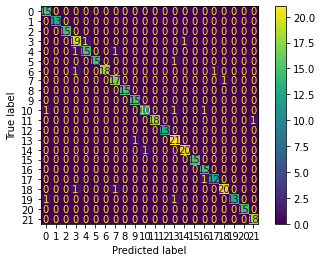

In [0]:
############################################# CONFUSION MATRIX
df['predic_categ']=df['text'].apply(lambda x: predict(x))
cm = confusion_matrix(df['category'],df['predic_categ'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 
plt.show()

In [0]:
print(dict_label_category)

{'Solicitud Cliente': 18, 'Convenios general': 3, 'Subsidios': 20, 'Giros': 7, 'Transacciones digitales': 21, 'Novedad Canal digital': 11, 'Prospecto': 16, 'Otros': 13, 'Giros Internacionales': 8, 'Contraprestaciones': 1, 'Convenio novedad/desconocimiento': 2, 'PQRS': 15, 'Mala atención ': 9, 'PAPs': 14, 'Solicitud Sistema/Falla dispositivos PAP': 19, 'Mediciones': 10, 'Capacitación': 0, 'Recaudos': 17, 'Novedad Canal llamada': 12, 'Gestión efectivo PAP': 6, 'Devoluciones': 4, 'Fraude/Comentarios negativos': 5}

/local_disk0/.ephemeral_nfs/envs/pythonEnv-055e5a6a-c032-4fcf-9ab3-5bd2b6b5db7f/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2068: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
 warnings.warn(

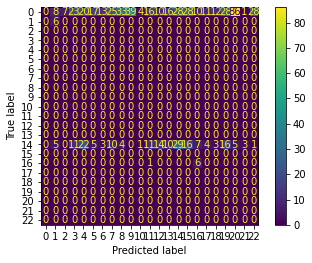

In [0]:

df_test = pd.read_csv(f"/dbfs/Efecty_VoC/BETOmodel/Datasets/{Nombre_archivo_testeo}.csv", sep=';',encoding = 'unicode_escape')
df_test.columns=['origen','text','label']
df_test['text2']=df_test['text']
df_test=df_test[~df_test['label'].isna()]
tratamiento_texto(df_test,'text')
df_test['predic_categ_test']=df_test['text'].apply(lambda x: predict(x))
df_test['category'] = df_test['label'].apply(lambda x: dict_label_category.get(x))
df_test['predic_lab_test']=df_test['predic_categ_test'].apply(lambda x: dict_label_category_inverse.get(x))

############################################# CONFUSION MATRIX
df_test.category.fillna(-99,inplace=True)
cm = confusion_matrix(df_test['category'],df_test['predic_categ_test'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 
plt.show()

In [0]:
# df_test[50:100]
# df_test[df_test['category']==3]


In [0]:
# df_test[df_test['category']==3]

# df_test.to_csv("/dbfs/Efecty_VoC/BETOmodel/Datasets/para_tabla_parametrica.csv")
# dbutils.fs.cp('/Efecty_VoC/BETOmodel/Datasets/para_tabla_parametrica.csv','/mnt/contenedor/Efecty_VoC/NLP Models/Datasets/para_tabla_parametrica.csv')


In [0]:
# Save model
name_file=f'/dbfs/Efecty_VoC/BETOmodel/Modelo_Tema1_{str(dt.date.today())}.pkl'
# torch.save(model,name_file)
dbutils.fs.cp(f'/Efecty_VoC/BETOmodel/Modelo_Tema1_{str(dt.date.today())}.pkl',f'/mnt/contenedor/Efecty_VoC/NLP Models/Modelos/Modelo_Tema1_{str(dt.date.today())}.pkl')

Out[51]: True